# Sprint5
## 機械学習スクラッチSVM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy.random import *
from sklearn.datasets import load_iris

## Irisデータ取得

In [2]:
iris=load_iris()

In [3]:
X=iris.data[50:,2:]
y=iris.target[50:]-1
y[:50]-=1
#y=y.tolist()

In [4]:
#シンプルデータセット1作成コード

np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X1 = np.concatenate((f0, f1))
y1 = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X1= X1[random_index]
y1 = y1[random_index]

## 【問題1】SVM分類器のクラスを作成する

In [5]:
class ScratchSVMClassifier():
    """
    SVMのスクラッチ
    
    Parameters
    ----------

    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    lam : lambda
      正則化の値
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録
    """
    
    def __init__(self, num_iter, lr, verbose, threshold=0.55):
        self.iter=num_iter
        self.lr=lr
        self.verbose=verbose
        self.ts=threshold
        #サポートベクタ配列
        self.lam_array=np.array([])
        self.y_label =np.array([])
        self.sv =np.array([])
        
    def fit(self,X,y,X_val=None,y_val=None):
        """
        SVMを学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        #サンプル数定義
        self.m=X.shape[0]
        
        #ラグランジュ関数の初期値設定
        self.lam=np.random.rand(self.m,1)
        
        #サポートベクトルを探す
        for n in rand(self.iter):
            y=y.reshape(-1,1)
            y_mat=np.dot(y,y.T)
            X_mat=np.dot(X,X.T)
            Xy_mat=y_mat*X_mat
            temp=np.dot(Xy_mat,self.lam)
            
            #ラグランジュ関数（ラムダ）更新式
            #print(self.lam)
            self.lam = self.lam + self.lr * (1-temp)
            #ラグランジュがマイナスの場合
            self.lam[np.where(self.lam<0,True,False)]=0
            
        # サポートベクター選定(閾値以上のラムダ格納) 
        self.lam_array =(self.lam[self.lam >= self.ts])
        #lam_arrayのshape
        #print(self.lam_array.shape,"ramuda")
        # 閾値以上のラムダのインデックスを取得
        self.sv_index =np.where(self.lam >= self.ts)[0]
        #sv_indexのshape
        #print(self.sv_index.shape,"svi")
        # ラベル取得
        self.y_label =y[self.sv_index]
        #self.y_labelのshape
        #print(self.y_label.shape,"yラベル")
        # サポートベクター取得
        self.sv =X[self.sv_index]    
        #self.cvのshape
        #print(self.sv.shape,"SV")
        
        self.X=X
        self.y=y
    def predict(self,X):
        """
        SVMを使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
       thetashould : 閾値　def＝０.５
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        
        pred = np.dot(self.lam_array,self.y_label*np.dot(self.sv,X.T))
        #pred = np.dot(self.lam.reshape(1,-1),self.y*np.dot(self.X,X.T))
        return np.where(pred<0,-1,1)
          

In [6]:
model_s1=ScratchSVMClassifier(10000, 0.0001, True, 0.01)

In [7]:
model_s1.fit(X1,y1)

In [8]:
model_s1.lam_array

array([0.25957362, 0.13194804, 0.16143248, 0.03419275, 0.01625297,
       0.16199285, 0.20612827, 0.02512942, 0.01030812])

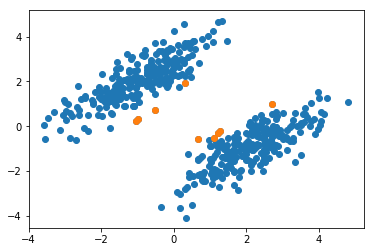

In [9]:
plt.scatter(X1[:,0],X1[:,1])
plt.scatter(model_s1.sv[:,0],model_s1.sv[:,1])
plt.show()

In [10]:
model=ScratchSVMClassifier(1000, 0.00001, True, 0)

In [11]:
model.fit(X,y)

In [12]:
model.lam_array

array([0.4374167 , 0.39742017, 0.19809589, 0.64739262, 0.89571843,
       0.95445185, 0.74922863, 0.53537297, 0.76466586, 0.90796172,
       0.19281658, 0.77832199, 1.00724869, 0.40921142, 1.01947078,
       0.24753475, 0.30782389, 0.29238265, 0.63877588, 0.85467487,
       1.04312582, 0.83664112, 0.40190496, 0.1776693 , 0.91732661,
       0.70770249, 0.16882973, 0.37203227, 0.65206512, 0.47806614,
       0.36210614, 0.50349775, 0.790867  , 0.8670214 , 0.56284091,
       0.18040238, 0.86638623, 0.48642307, 0.92852922, 0.90360598,
       0.17116587, 0.38399098, 0.33220369, 0.97668939, 0.59408132,
       1.00540072, 0.39298833, 0.91190314, 0.94338611, 0.96071061,
       0.31238448, 0.27894052, 0.04293266, 0.6045471 , 0.03481382,
       0.53997451, 0.29864351, 0.04649056, 0.92906291, 0.7954669 ,
       0.73459951, 0.80517245, 0.37832644, 0.20480531, 0.11626265,
       0.65211752, 0.76564509, 0.09992627, 0.9284526 , 0.59038158,
       0.70088076, 0.16739639, 0.70647424, 0.00238426, 0.56339

In [14]:
model.predict(X)

array([-1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,
        1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25,random_state=9999)

In [16]:
class ScratchSVMClassifier2:
    def __init__(self, num_iter, lr, threshold=1e-5):
        self.iter = num_iter
        self.lr = lr
        self.ts = threshold
        self.y_label = []
        self.sv = []
        self.lam_array = [] 
        
    def fit(self, X, y):
        # ラムダ配列初期値
        lam = np.random.rand(len(X), 1)
        
        # サポートベクトル探索
        for n in range(self.iter):
            for i in range(len(X)):
                temp = 0
                for j in range(len(X)):
                    temp += lam[j]*y[i]*y[j]*np.dot(X[i].T, X[j])
                # ラムダの更新
                lam[i] = lam[i] + self.lr * (1 - temp)
                if(lam[i] < 0):
                    lam[i] = 0
                    
        # 閾値以上のラムダ選出
        self.lam_array = lam[lam >= self.ts]
        # 閾値以上のラムダのインデックスを取得
        index = np.where(lam >= self.ts)[0]
        # yラベルを取得
        self.y_label = y[index]
        # サポートベクター配列
        self.sv = X[index]       
        
    def predict(self, X):
        
        pred = 0
        for i in range(len(self.sv)):
                pred = pred +self.lam_array[i] * self.y_label[i] * np.dot(X, self.sv[i].T)
                
        return pred

In [17]:
model2=ScratchSVMClassifier2(200,0.01)

In [18]:
model2.fit(X_train,y_train)

In [19]:
model2.predict(X_test)

array([-0.49842792, -0.4248118 , -0.71927626, -0.48582097, -0.53422321,
       -0.28388305,  0.85210289, -0.33431081,  0.47344091,  0.27150298,
        0.22310075, -0.09455206,  0.1010824 , -0.22287387, -0.81608072,
       -0.09455206, -0.26497263,  0.93202247,  0.52814661, -0.2165704 ,
       -0.4248118 , -0.1618647 , -0.18077511, -0.61414279,  0.41243174])

## 【問題3】指標値の算出

## 【問題4】決定領域の可視化

In [20]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def SVM(X, y, model, step=0.01, title='logistic region', xlabel='petal_length', ylabel='petal_width', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
 
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

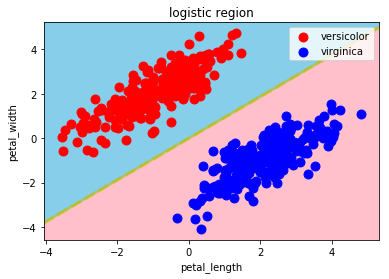

In [22]:
SVM(X1,y1,model_s1)

## 【問題５】時間の計測

In [25]:
import time
t0 = time.time()
model=ScratchSVMClassifier(1000, 0.00001, True, 0)
model.fit(X,y)
t1 = time.time()
print('time : {}s'.format(t1-t0))

time : 0.14194393157958984s
